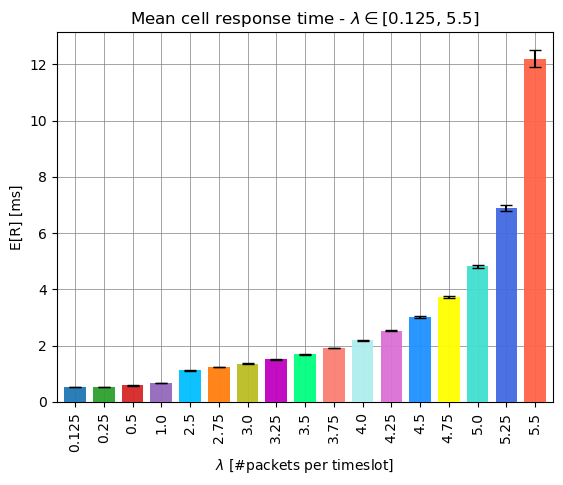

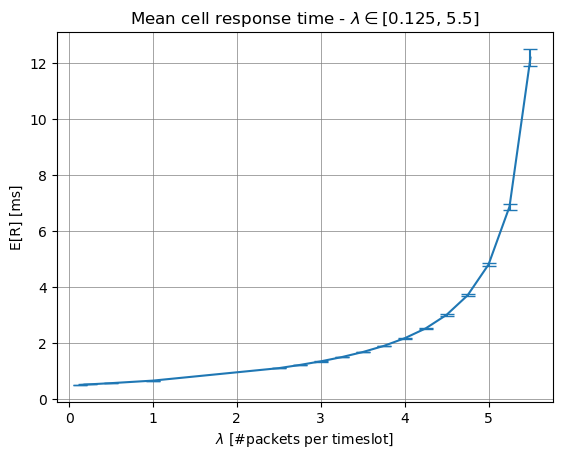

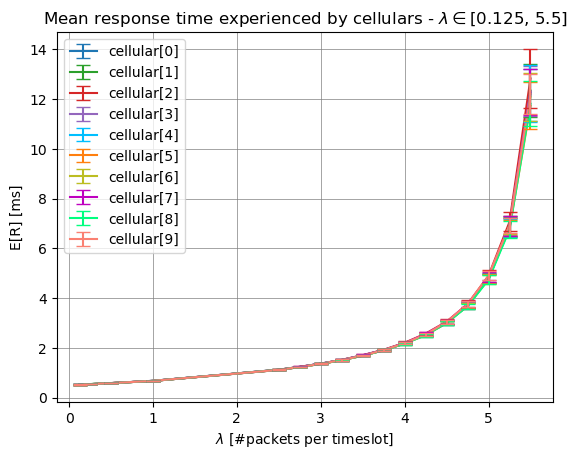

In [34]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl 
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# compute confidence interval with Student's T distribuition
# before computing anything check if RV are normal and iid
def compute_ci_student_t (data,alpha = 0.95): 
    # number of degrees of freedom of the sample
    degrees = len(data)-1
    # sample mean
    mean = np.mean(data)
    # std error = sample_std/sqrt(n)    
    sem = st.sem(data)
    return st.t.interval(alpha,degrees,mean,sem)

path     = './'
rate     = ['0_125','0_25','0_5','1_0','2_5','2_75','3_0','3_25','3_5','3_75','4_0','4_25','4_5','4_75','5_0','5_25','5_5']
rate_    = [0.125,0.25,0.5,1,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
csv_name = 'response_time_lambda'
colors   = ['tab:blue','tab:green','tab:red','tab:purple','deepskyblue','tab:orange','tab:olive','m','springgreen','salmon','paleturquoise','orchid','dodgerblue','yellow','turquoise','royalblue','tomato','chartreuse']

cellular = [[],[],[],[],[],[],[],[],[],[]]
cellular_ci = [[],[],[],[],[],[],[],[],[],[]]
mean_cell_response_time = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

def main():
    
    for r in range(0,len(rate_)):
    # start 'for r in range(0,len(rate)):'

        # parse csv
        raw = pd.read_csv(path + csv_name + rate[r] + '.csv')

        mean_response_time_rep = raw['value']
        module = raw['module']
        rep = raw['repetition']
        
        mean_response_time = [[],[],[],[],[],[],[],[],[],[]]

        for i in range(0,len(mean_response_time_rep)):
            mean_response_time[i%10].append(mean_response_time_rep[i]*1000)
            mean_cell_response_time[r].append(mean_response_time_rep[i]*1000)
            #print(module[i] + '#' + str(rep[i]) + ' (' + str(i%10) + ') <= ' + str(mean_response_time_rep[i]*1000))
            
        #to_plot = []
        #ci      = []
        
        for i in range(0,len(mean_response_time)):
            cellular[i].append(np.mean(mean_response_time[i]))
            interval_ci = compute_ci_student_t(mean_response_time[i])
            cellular_ci[i].append(interval_ci[1]-interval_ci[0])
            
        #plt.bar([0,1,2,3,4,5,6,7,8,9], to_plot, color=colors, alpha=0.95, width=0.70, yerr=ci, capsize=4, zorder=10)
        #plt.xlabel('Cellular[i]')
        #plt.ylabel('E[R] [ms]')
        #plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
        #plt.title('Mean response time - $\lambda$ = ' + str(rate_[r]) + ' [#packets per timeslot]')
        #plt.savefig('./plots/E[R]_lambda' + str(rate[r]) + '.png', bbox_inches='tight')
        #plt.show()
                
        # end 'for r in range(0,len(rate)):'
        
    to_plot = []
    ci      = []

    for r in range(0,len(rate_)):
        to_plot.append(np.mean(mean_cell_response_time[r]))
        interval_ci = compute_ci_student_t(mean_cell_response_time[r])
        ci.append(interval_ci[1]-interval_ci[0])
    
    df = pd.DataFrame({'Rate [#packets per timeslot]':rate_, 'E[R] [ms]':to_plot})
    ax = df.plot.bar(x='Rate [#packets per timeslot]', y='E[R] [ms]', width=0.75, color=colors, legend=False,alpha=0.95, yerr=ci, capsize=4, zorder=10)
    ax.grid(True,color='grey',linewidth='0.5',linestyle='-')
    ax.set_title('Mean cell response time - $\lambda \in [$' + str(rate_[0]) + ', ' + str(rate_[len(rate_)-1]) + ']')
    ax.set_xlabel('$\lambda$ [#packets per timeslot]')
    ax.set_ylabel('E[R] [ms]')
    plt.savefig('./plots/E[R]_cell_bar_chart.png', bbox_inches='tight')
    plt.show()
    
    plt.errorbar(rate_,to_plot,ci,capsize=5,color='tab:blue',barsabove=True)
    plt.ylabel('E[R] [ms]')
    plt.xlabel('$\lambda$ [#packets per timeslot]')
    plt.title('Mean cell response time - $\lambda \in [$' + str(rate_[0]) + ', ' + str(rate_[len(rate_)-1]) + ']')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.savefig('./plots/E[R]_cell.png', bbox_inches='tight')
    plt.show()
    
    for i in range(0,len(cellular)):
        plt.errorbar(rate_,cellular[i],cellular_ci[i],capsize=5,color=colors[i],barsabove=True,label='cellular['+str(i)+']')
        plt.ylabel('E[R] [ms]')
        plt.xlabel('$\lambda$ [#packets per timeslot]')
        plt.title('Mean response time experienced by cellulars - $\lambda \in [$' + str(rate_[0]) + ', ' + str(rate_[len(rate_)-1]) + ']')
        plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
        
    plt.legend(frameon=True)
    plt.savefig('./plots/E[R]_behaviour.png', bbox_inches='tight')
    plt.show()
    
    
if __name__ == '__main__':
    main()